# Cyber attack dataset Analysis :
This notebook provides a description of the dataset Cyber_attacks (available in [Kaggle](https://www.kaggle.com/datasets/teamincribo/cyber-security-attacks/data))\
It supplies 40 000 synthetic records spread in 25 attributes, each row corresponding to an attack type : Malware, DDoS and Intrusion. These later are used by hackers\pirates to compromise a target's IT security by violating the integrity, confidentiality and availability of sensitive data such as personal, financial, industrial or security information.
- Malware is a  malicious software produced to damage a computer system (e.g. viruses, Trojans, ransomware),
 - DDoS (Distributed Denial of Service) is a set of computer attacks designed to overwhelm a server or network with a large number of requests, overloading it or rendering it unavailable,
  - Intrusion is an unauthorized accesses to a computer system to extract, modify or destroy data via security holes [1].\

These dataset records attacks occurred from January 1, 2020, to October 11, 2023.

The aim of the present notebook is to understand the 3 types of attack and their correlation with the attributes in order to  predict them using a machine learning approach.
To answer this goal, our study is organized in four parts:
1. Exploration of raw data
2. Features engineering
3. Prediction of future attacks
4. Conclusion

*This project describes group work by Victor Coppin, Damien Rondet, Sachiththa Konara Mudiyanselage, Hugo Carton, Nans Long and Naro Kuoch.*




Before to go deeply in details in the overview of our data set, we need to describe the attributes.
These later are described in the list below, from information of wikipedia :
- Timestamp: Attack date and schedule
- Source IP Address: Pirate IP Address
- Destination IP Address: Recipient IP Address IP
- Source Port:Port used by Pirate
- Destination Port: Port used by Host target
- Protocol: Network protocol used in the communication Pirate/Host target
- Packet Length: Packet size (bytes)
- Packet Type: Packet classification
- Traffic Type: Characterization of network traffic
- Payload Data: Data carried in the packet
- Malware Indicators: Signs of  Pirates software
- Anomaly Scores: Numerical score of  a suspicious behavior in comparison to control condition
- Alerts/Warnings: Security message to notify an unusual event
- Attack Type: Identification of a Pirate attack
- Attack Signature: Specific pattern of Pirate attack
- Action Taken: Defense responses
- Severity Level: Impact level of the event
- User Information: User informations
- Device Information: Device informations
- Network Segment: The part of the network touched by the attack
- Geo-location Data: Geographic location of Pirate
- Proxy Information: Proxy server IP address
- Firewall Logs: Recording of firewall activities
- IDS/IPS Alerts: Alerts from intrusion detection system/ intrusion prevention system
- Log Source: identifies the origin of a recorded event


 In our exploration of raw data, we performed an overview of data set without transformations or creations of new variables in order to see the relations between the attributes. For this purpose, we examined the device responses, then the network traffic category, and we finished with a temporal vision of all the survey.

## EDA

In [90]:
import pandas as pd
import config
import utils
cyber_security_df = pd.read_csv(config.DATASET_CYBERSECURITY_ATTACKS_CSV)

- Dataset checkout

In [91]:
cyber_security_df.head().T

,0,1,2,3,4
Timestamp,2023-05-30 06:33:58,2020-08-26 07:08:30,2022-11-13 08:23:25,2023-07-02 10:38:46,2023-07-16 13:11:07
Source IP Address,103.216.15.12,78.199.217.198,63.79.210.48,163.42.196.10,71.166.185.76
Destination IP Address,84.9.164.252,66.191.137.154,198.219.82.17,101.228.192.255,189.243.174.238
Source Port,31225,17245,16811,20018,6131
Destination Port,17616,48166,53600,32534,26646
Protocol,ICMP,ICMP,UDP,UDP,TCP
Packet Length,503,1174,306,385,1462
Packet Type,Data,Data,Control,Data,Data
Traffic Type,HTTP,HTTP,HTTP,HTTP,DNS
Payload Data,Qui natus odio asperiores nam. Optio nobis ius...,Aperiam quos modi officiis veritatis rem. Omni...,Perferendis sapiente vitae soluta. Hic delectu...,Totam maxime beatae expedita explicabo porro l...,Odit nesciunt dolorem nisi iste iusto. Animi v...


df.info()

In [92]:
cyber_security_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

- Check missing values

In [93]:
cyber_security_df.isnull().sum().sort_values(ascending=False)

Alerts/Warnings           20067
IDS/IPS Alerts            20050
Malware Indicators        20000
Firewall Logs             19961
Proxy Information         19851
Source IP Address             0
Destination IP Address        0
Source Port                   0
Timestamp                     0
Traffic Type                  0
Packet Type                   0
Packet Length                 0
Protocol                      0
Destination Port              0
Attack Type                   0
Payload Data                  0
Anomaly Scores                0
Severity Level                0
Action Taken                  0
Attack Signature              0
User Information              0
Geo-location Data             0
Network Segment               0
Device Information            0
Log Source                    0
dtype: int64

- Missing values by percentage

In [94]:
cyber_security_df.isnull().sum().sort_values(ascending=False) / len(cyber_security_df) * 100

Alerts/Warnings           50.1675
IDS/IPS Alerts            50.1250
Malware Indicators        50.0000
Firewall Logs             49.9025
Proxy Information         49.6275
Source IP Address          0.0000
Destination IP Address     0.0000
Source Port                0.0000
Timestamp                  0.0000
Traffic Type               0.0000
Packet Type                0.0000
Packet Length              0.0000
Protocol                   0.0000
Destination Port           0.0000
Attack Type                0.0000
Payload Data               0.0000
Anomaly Scores             0.0000
Severity Level             0.0000
Action Taken               0.0000
Attack Signature           0.0000
User Information           0.0000
Geo-location Data          0.0000
Network Segment            0.0000
Device Information         0.0000
Log Source                 0.0000
dtype: float64

# Handle Missing Values

In [103]:
cyber_security_df['Alerts/Warnings'].value_counts()

Alerts/Warnings
No Alert Triggered    20067
Alert Triggered       19933
Name: count, dtype: int64

In [104]:
cyber_security_df['Alerts/Warnings'] = cyber_security_df['Alerts/Warnings'].apply(lambda x: 'No Alert Triggered' if pd.isna(x) else x)

In [105]:
cyber_security_df['Malware Indicators'].value_counts()

Malware Indicators
IoC Detected    20000
No Detection    20000
Name: count, dtype: int64

In [106]:
cyber_security_df['Malware Indicators'] = cyber_security_df['Malware Indicators'].apply(lambda x: 'No Detection' if pd.isna(x) else x)

In [107]:
cyber_security_df['Firewall Logs'].value_counts()

Firewall Logs
Log Data    20039
Name: count, dtype: int64

In [109]:
cyber_security_df['Firewall Logs'] = cyber_security_df['Firewall Logs'].apply(lambda x: 'No Log Data' if pd.isna(x) else x)

In [110]:
cyber_security_df['IDS/IPS Alerts'].value_counts()

IDS/IPS Alerts
Alert Data    19950
Name: count, dtype: int64

In [111]:
cyber_security_df['IDS/IPS Alerts'] = cyber_security_df['IDS/IPS Alerts'].apply(lambda x: 'No Alert Data' if pd.isna(x) else x)

In [112]:
cyber_security_df['Proxy Information'] = cyber_security_df['Proxy Information'].apply(lambda x: 'No proxy' if pd.isna(x) else x)

In [113]:
cyber_security_df.isnull().sum().sort_values(ascending=False)

Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
dtype: int64

In [114]:
cyber_security_df.describe()

,Source Port,Destination Port,Packet Length,Anomaly Scores
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,781.452725,50.113473
std,18560.425604,18574.668842,416.044192,28.853598
min,1027.000000,1024.000000,64.000000,0.000000
25%,16850.750000,17094.750000,420.000000,25.150000
50%,32856.000000,33004.500000,782.000000,50.345000
75%,48928.250000,49287.000000,1143.000000,75.030000
max,65530.000000,65535.000000,1500.000000,100.000000


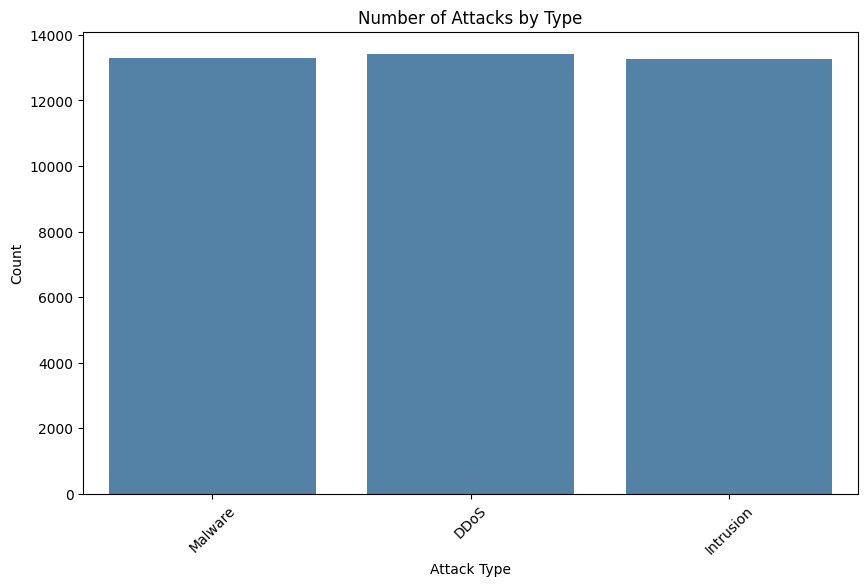

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(10, 6))
plt.title("Number of Attacks by Type")

# Create a vertical count plot
sns.countplot(data=cyber_security_df, x='Attack Type', color='steelblue')

# Formatting
plt.xlabel("Attack Type")
plt.ylabel("Count")

plt.xticks(rotation=45)

# Show plot
plt.show()

The attack types—Malware, DDoS, and Intrusions—are equally distributed. Therefore, the ML project is a balanced classification problem

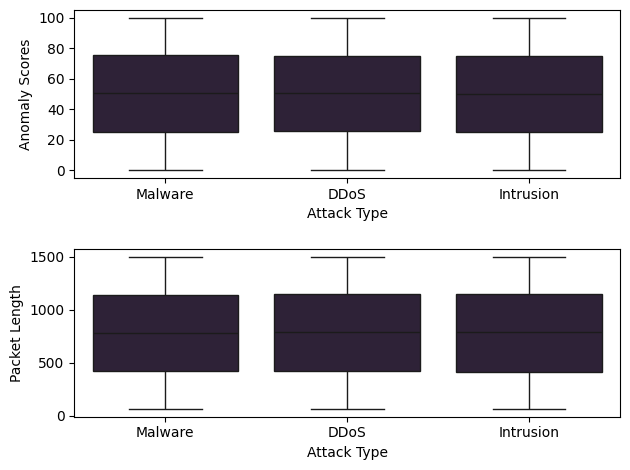

In [116]:
sns.set_palette("mako")

fig,(ax1, ax2) = plt.subplots(2, 1)

# Malware Indicators
sns.boxplot(data=cyber_security_df, x="Attack Type", y="Anomaly Scores", ax=ax1)

# IDS/IPS Alerts
sns.boxplot(data=cyber_security_df, x="Attack Type", y="Packet Length", ax=ax2)



# sns.despine(bottom=True)
plt.tight_layout(h_pad=2)
plt.show()

- The distribution of Anomaly scores for each Attack Type Class appear similar based on their box plots. Threfore it is no significant difference in Anomaly Scores distributions across the Attack Type classes.
- The distribution of Packet Lenght for each Attack Type Class appear similar based on their box plots. Threfore it is no significant difference in Packet Lenght distributions across the Attack Type classes.

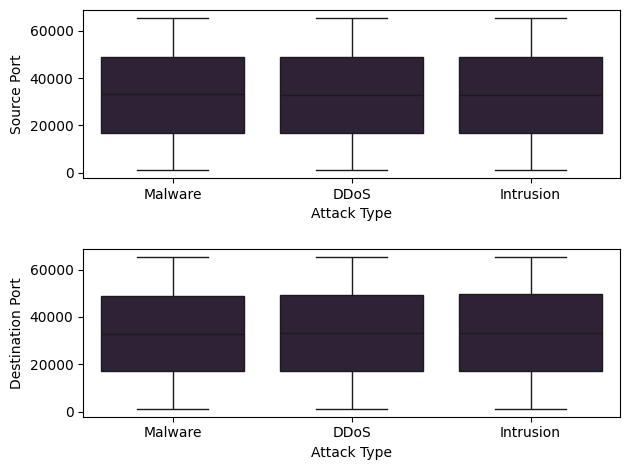

In [117]:
sns.set_palette("mako")

fig,(ax1, ax2) = plt.subplots(2, 1)

# Malware Indicators
sns.boxplot(data=cyber_security_df, x="Attack Type", y="Source Port", ax=ax1)

# IDS/IPS Alerts
sns.boxplot(data=cyber_security_df, x="Attack Type", y="Destination Port", ax=ax2)



# sns.despine(bottom=True)
plt.tight_layout(h_pad=2)
plt.show()

- The distribution of Source Port for each Attack Type Class appear similar based on their box plots. Threfore it is no significant difference in Source Port distributions across the Attack Type classes.
- The distribution of Destination Port for each Attack Type Class appear similar based on their box plots. Threfore it is no significant difference in Destination distributions across the Attack Type classes.

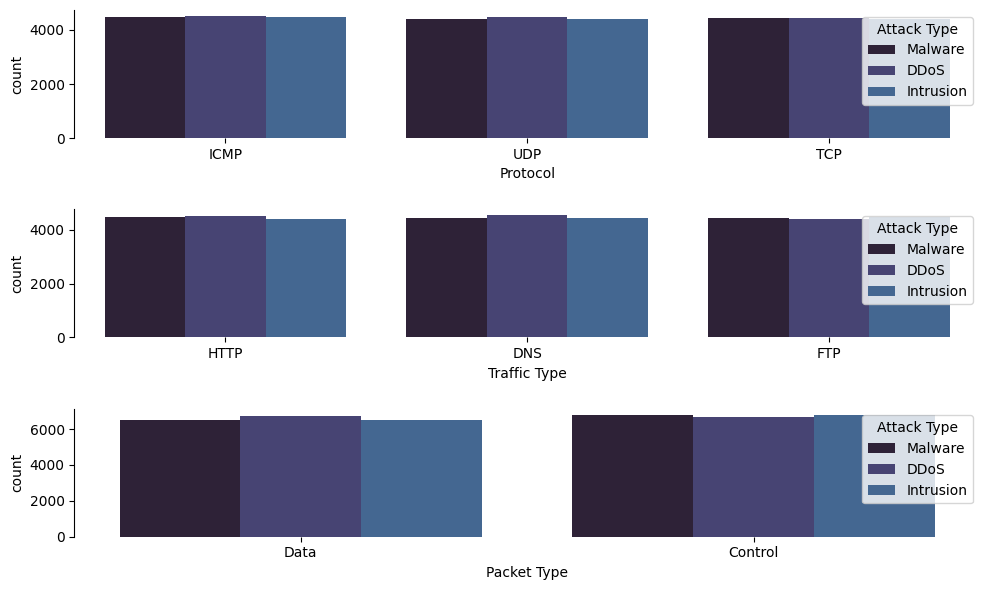

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("mako")

fig,(ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 6), sharex=False)

# Protocol
sns.countplot(data=cyber_security_df, x='Protocol', hue='Attack Type',ax=ax1)

# Traffic Type
sns.countplot(data=cyber_security_df, x='Traffic Type', hue='Attack Type',ax=ax2)

# Packet Type
sns.countplot(data=cyber_security_df, x='Packet Type', hue='Attack Type',ax=ax3)

sns.despine(bottom=True)
plt.tight_layout(h_pad=2)
plt.show()

- Within each **Protocol** (*ICMP*, *UDP*, *TCP*), the count of **Attack Type** classes (*Malware*, *Intrusion*, *DDoS*) is uniform. Additionally, for each **Protocol**, the count **Attack Type** classes are evenly distributed. This indicates no significant variation of **Attack Type** with **Protocol**. 

- Within each **Traffic Type** (*HTTP*, *DNS*, *FTP*), the count of **Attack Type** classes (*Malware*, *Intrusion*, *DDoS*) is uniform. Additionally, for each **Traffic Type**, the count **Attack Type** classes are evenly distributed. This indicates no significant variation of **Attack Type** with **Traffic Type**. 

- Within each **Packet Type** (*Control*, *Data*), the count of **Attack Type** classes (*Malware*, *Intrusion*, *DDoS*) is uniform. Additionally, for each **Packet Type**, the count **Attack Type** classes are evenly distributed. This indicates no significant variation of **Attack Type** with **Packet Type**. 


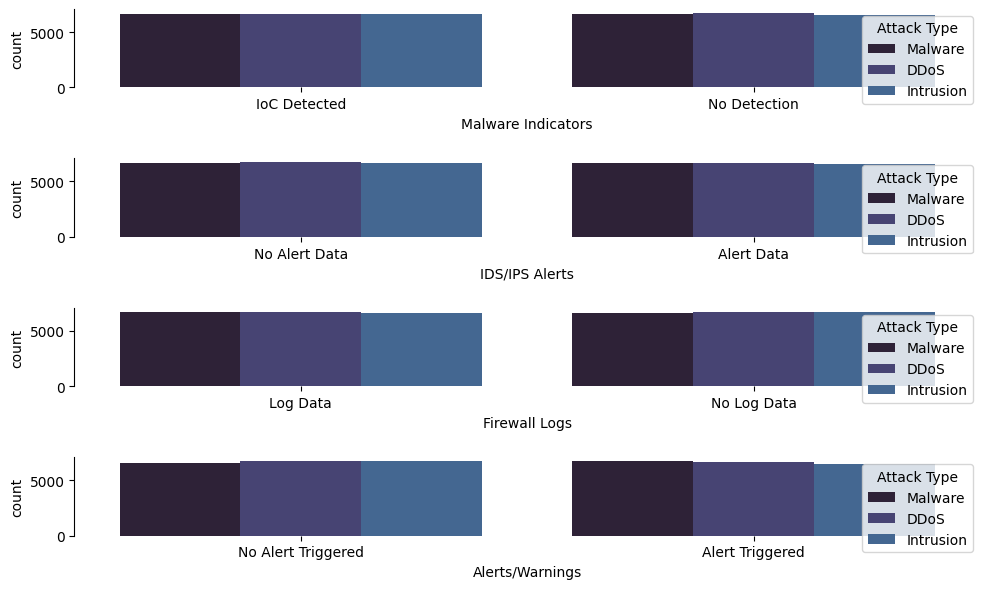

Malware Indicators
IoC Detected    20000
No Detection    20000
Name: count, dtype: int64

In [119]:
sns.set_palette("mako")

fig,(ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 6), sharex=False)

# Malware Indicators
sns.countplot(data=cyber_security_df, x='Malware Indicators', hue='Attack Type',ax=ax1)

# IDS/IPS Alerts
sns.countplot(data=cyber_security_df, x='IDS/IPS Alerts', hue='Attack Type',ax=ax2)

# Firewall Logs
sns.countplot(data=cyber_security_df, x='Firewall Logs', hue='Attack Type',ax=ax3)

# Alerts/Warnings
sns.countplot(data=cyber_security_df, x='Alerts/Warnings', hue='Attack Type',ax=ax4)

sns.despine(bottom=True)
plt.tight_layout(h_pad=2)
plt.show()
cyber_security_df['Malware Indicators'].value_counts()

- Within each **Malware Indicators** (*IoC Detected*, *No Detection*), the count of **Attack Type** classes (*Malware*, *Intrusion*, *DDoS*) is uniform. Additionally, for each **Protocol**, the count **Attack Type** classes are evenly distributed. This indicates the for each **Attack type** the system is responding in a similar way. For each Attack Type way the security system is reacting the same way.

- Within each **IDS/IPS Alerts** (*Alerts*, *No Alerts*), the count of **Attack Type** classes (*Malware*, *Intrusion*, *DDoS*) is uniform. Additionally, for each **IDS/IPS Alerts**, the count **Attack Type** classes are evenly distributed. This indicates no significant variation of **Attack Type** with **IDS/IPS Alerts**. The type of attack doesn't change how  many alerts the system produces.

- Within each **Firewall Logs** (*Log Data*, *No Log Data*), the count of **Attack Type** classes (*Malware*, *Intrusion*, *DDoS*) is uniform. Additionally, for each **Firewall Logs**, the count **Attack Type** classes are evenly distributed. This indicates no significant variation of **Attack Type** with **Firewall Logs**. The type of attack doesent make noticeble diffence inthe how the firewall logdata

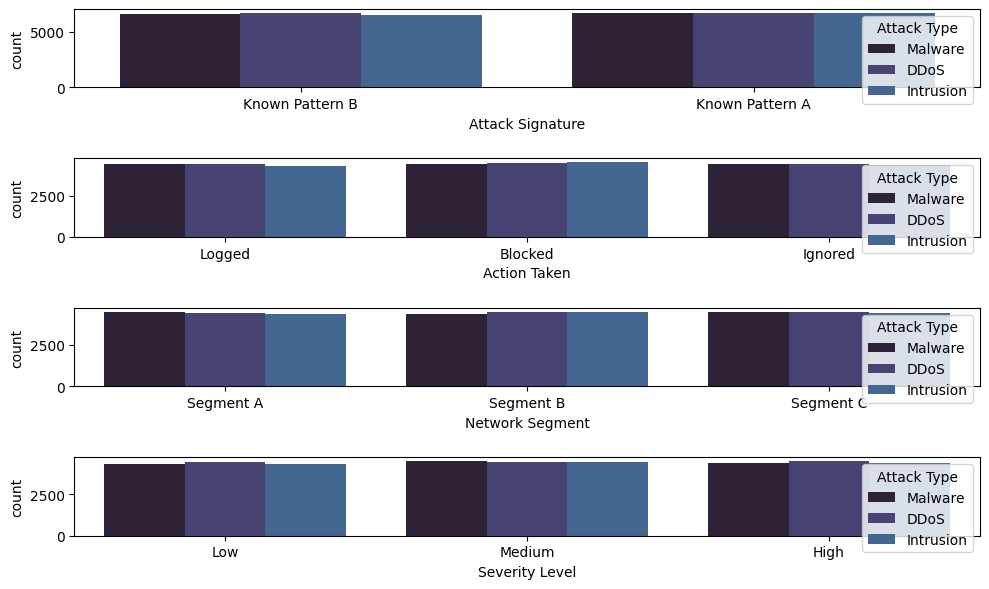

Malware Indicators
IoC Detected    20000
No Detection    20000
Name: count, dtype: int64

In [120]:
sns.set_palette("mako")

fig,(ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 6), sharex=False)

# Malware Indicators
sns.countplot(data=cyber_security_df, x='Attack Signature', hue='Attack Type',ax=ax1)

# IDS/IPS Alerts
sns.countplot(data=cyber_security_df, x='Action Taken', hue='Attack Type',ax=ax2)

# Firewall Logs
sns.countplot(data=cyber_security_df, x='Network Segment', hue='Attack Type',ax=ax3)

sns.countplot(data=cyber_security_df, x='Severity Level', hue='Attack Type',ax=ax4)

plt.tight_layout(h_pad=2)
plt.show()
cyber_security_df['Malware Indicators'].value_counts()

- Within each **Attack Signature** (*Known Pattern A*, *Known Pattern B*), the count of **Attack Type** classes (*Malware*, *Intrusion*, *DDoS*) is uniform. Additionally, for each **Attack Signature**, the count **Attack Type** classes are evenly distributed. This indicates no significant variation of **Attack Type** with **Attack Signature**. 

- Within each **Action Taken** (*Logged*, *Blocked*, *Ignored*), the count of **Attack Type** classes (*Malware*, *Intrusion*, *DDoS*) is uniform. Additionally, for each **Action Taken**, the count **Attack Type** classes are evenly distributed. This indicates no significant variation of **Attack Type** with **Action Taken**. 

- Within each **Network Segment** (*Segment A*, *Segment B*, *Segment C*), the count of **Attack Type** classes (*Malware*, *Intrusion*, *DDoS*) is uniform. Additionally, for each **Network Segment**, the count **Attack Type** classes are evenly distributed. This indicates no significant variation of **Attack Type** with **Network Segment**. 

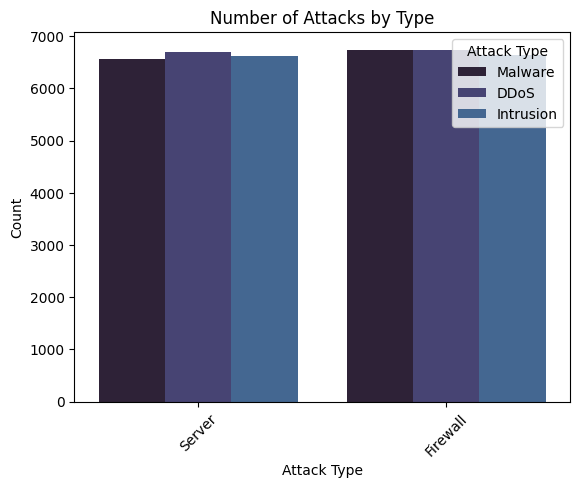

In [121]:
plt.title("Number of Attacks by Type")

# Create a vertical count plot
sns.countplot(data=cyber_security_df, x='Log Source', hue='Attack Type')

# Formatting
plt.xlabel("Attack Type")
plt.ylabel("Count")

plt.xticks(rotation=45)

# Show plot
plt.show()

In [122]:
import ipaddress

def get_ip_class(ip_address):
    first_octet = int(ip_address.split('.')[0])

    if 1 <= first_octet <= 126:
        return "Class A"
    elif 128 <= first_octet <= 191:
        return "Class B"
    elif 192 <= first_octet <= 223:
        return "Class C"
    elif 224 <= first_octet <= 239:
        return "Class D"
    elif 240 <= first_octet <= 255:
        return "Class E"
    else:
        return "Invalid IP Address"
    



In [123]:
cyber_security_df['Source IP Class'] = cyber_security_df['Source IP Address'].apply(get_ip_class)
cyber_security_df['Destination IP Class'] = cyber_security_df['Destination IP Address'].apply(get_ip_class)

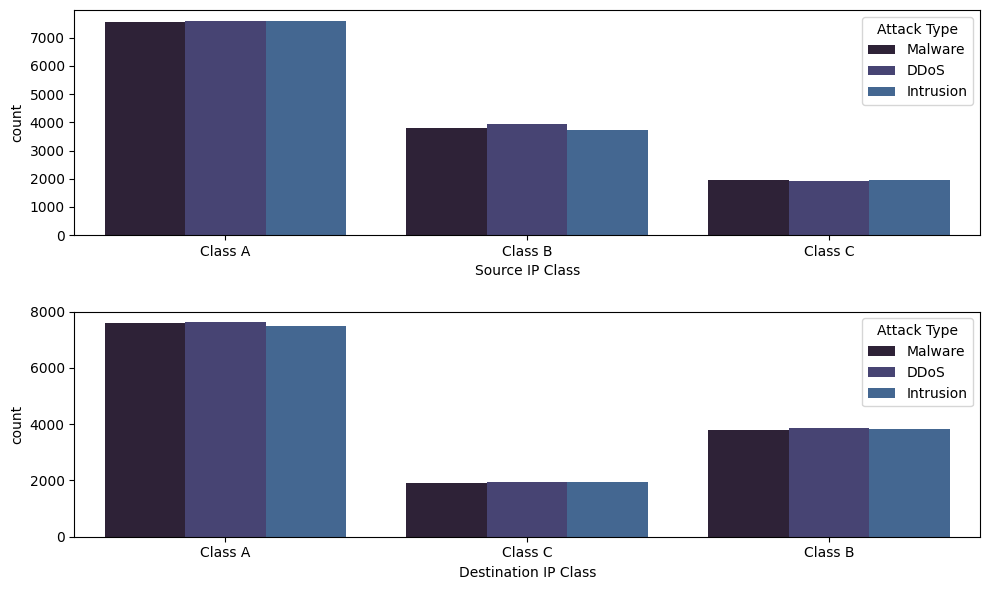

In [124]:
sns.set_palette("mako")

fig,(ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=False)

# Malware Indicators
sns.countplot(data=cyber_security_df, x='Source IP Class', hue='Attack Type',ax=ax1)

# IDS/IPS Alerts
sns.countplot(data=cyber_security_df, x='Destination IP Class', hue='Attack Type',ax=ax2)
plt.tight_layout(h_pad=2)

plt.show()

In [125]:
import ipaddress
def is_private_ip(ip_address):
    return  "Private" if ipaddress.ip_address(ip_address).is_private else "Public"

In [126]:
cyber_security_df['Source IP Visibility'] = cyber_security_df['Source IP Address'].apply(is_private_ip)
cyber_security_df['Destination IP Visibility'] = cyber_security_df['Destination IP Address'].apply(is_private_ip)

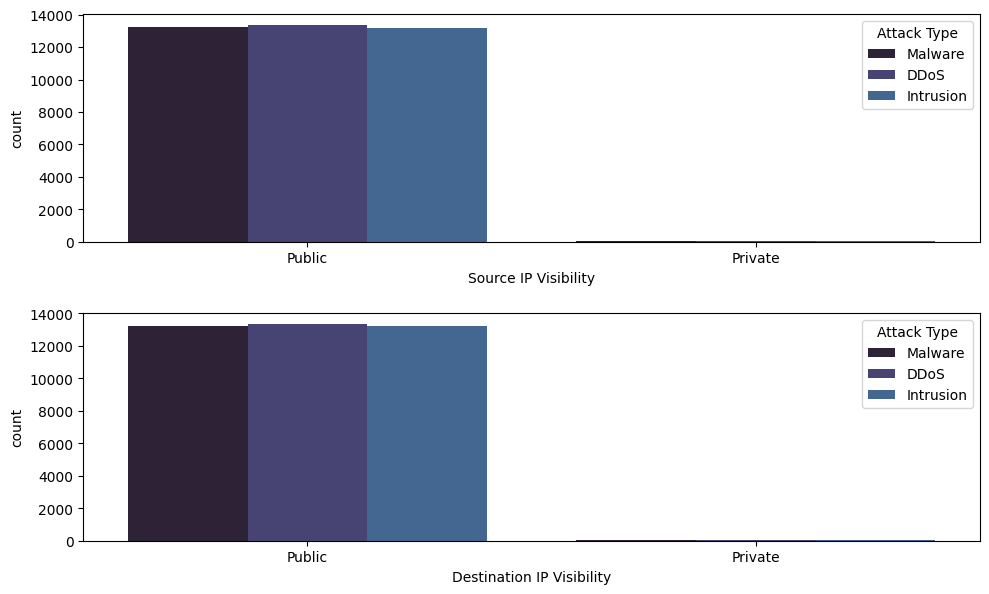

In [127]:
sns.set_palette("mako")

fig,(ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=False)

# Malware Indicators
sns.countplot(data=cyber_security_df, x='Source IP Visibility', hue='Attack Type',ax=ax1)

# IDS/IPS Alerts
sns.countplot(data=cyber_security_df, x='Destination IP Visibility', hue='Attack Type',ax=ax2)
plt.tight_layout(h_pad=2)

plt.show()

In [166]:
cyber_security_df = cyber_security_df.drop(columns=['Source IP Visibility', 'Destination IP Visibility']) 

In [128]:
# Iterate over DataFrame rows
from uaparser import UAParser as parse_ua

for index, row in cyber_security_df.iterrows():
    parsed_ua = parsed_ua = parse_ua(row['Device Information']) 

    os_name = parsed_ua.os.get('name') or 'Unknown'# Major version

    browser_name = parsed_ua.browser.get('name') or 'Unknown'

    device_type = parsed_ua.device.get('type') or  'PC'

    # Assign extracted values to new columns
    cyber_security_df.at[index, 'OS'] = os_name
    cyber_security_df.at[index, 'Browser'] = browser_name
    cyber_security_df.at[index, 'Device'] = device_type

In [130]:
cyber_security_df.isnull().sum().sort_values(ascending=False)

Timestamp                    0
Source IP Address            0
Destination IP Address       0
Source Port                  0
Destination Port             0
Protocol                     0
Packet Length                0
Packet Type                  0
Traffic Type                 0
Payload Data                 0
Malware Indicators           0
Anomaly Scores               0
Alerts/Warnings              0
Attack Type                  0
Attack Signature             0
Action Taken                 0
Severity Level               0
User Information             0
Device Information           0
Network Segment              0
Geo-location Data            0
Proxy Information            0
Firewall Logs                0
IDS/IPS Alerts               0
Log Source                   0
Source IP Class              0
Destination IP Class         0
Source IP Visibility         0
Destination IP Visibility    0
OS                           0
Browser                      0
Device                       0
dtype: i

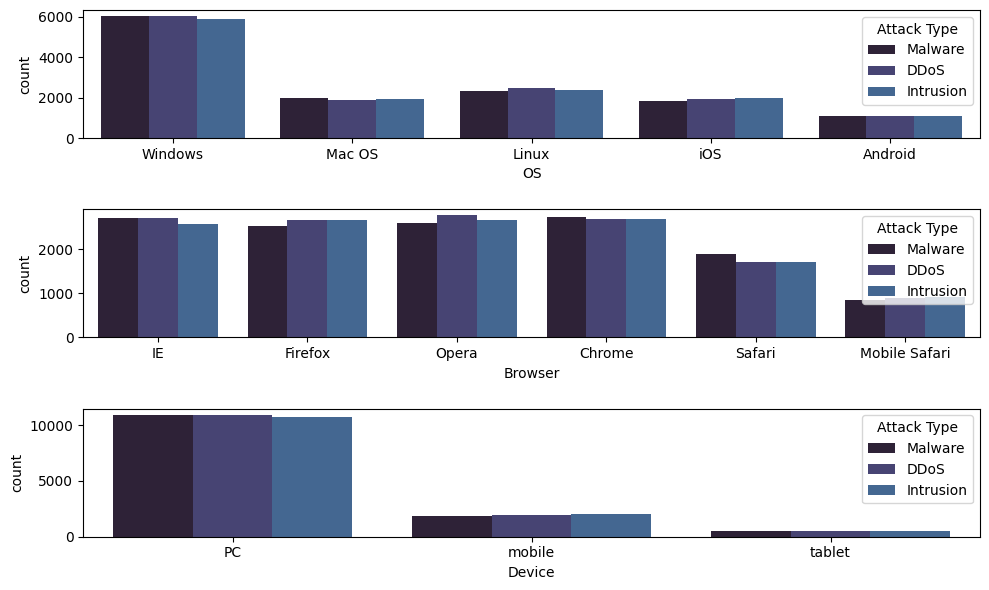

Browser
Chrome           8105
Opera            8049
IE               7995
Firefox          7881
Safari           5314
Mobile Safari    2656
Name: count, dtype: int64

In [131]:
sns.set_palette("mako")

fig,(ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 6), sharex=False)

# OS
sns.countplot(data=cyber_security_df, x='OS', hue='Attack Type',ax=ax1)

# Browser
sns.countplot(data=cyber_security_df, x='Browser', hue='Attack Type',ax=ax2)

# Device
sns.countplot(data=cyber_security_df, x='Device', hue='Attack Type',ax=ax3)


plt.tight_layout(h_pad=2)
plt.show()
cyber_security_df['Browser'].value_counts()

In [132]:
def categorize_port(port: int):
    if 0 <= port <= 1023:
        return 'SystemPorts'
    elif 1024 <= port <= 49151:
        return 'UserPorts'
    elif 49152 <= port <= 65535:
        return 'Dynamic'
    else:
        return 'Unknow'

In [133]:
cyber_security_df['Source Port Category'] = cyber_security_df['Source Port'].apply(categorize_port)
cyber_security_df['Destination Port Category'] = cyber_security_df['Destination Port'].apply(categorize_port)

In [134]:
cyber_security_df.isnull().sum().sort_values(ascending=False)

Timestamp                    0
Source IP Address            0
Destination IP Address       0
Source Port                  0
Destination Port             0
Protocol                     0
Packet Length                0
Packet Type                  0
Traffic Type                 0
Payload Data                 0
Malware Indicators           0
Anomaly Scores               0
Alerts/Warnings              0
Attack Type                  0
Attack Signature             0
Action Taken                 0
Severity Level               0
User Information             0
Device Information           0
Network Segment              0
Geo-location Data            0
Proxy Information            0
Firewall Logs                0
IDS/IPS Alerts               0
Log Source                   0
Source IP Class              0
Destination IP Class         0
Source IP Visibility         0
Destination IP Visibility    0
OS                           0
Browser                      0
Device                       0
Source P

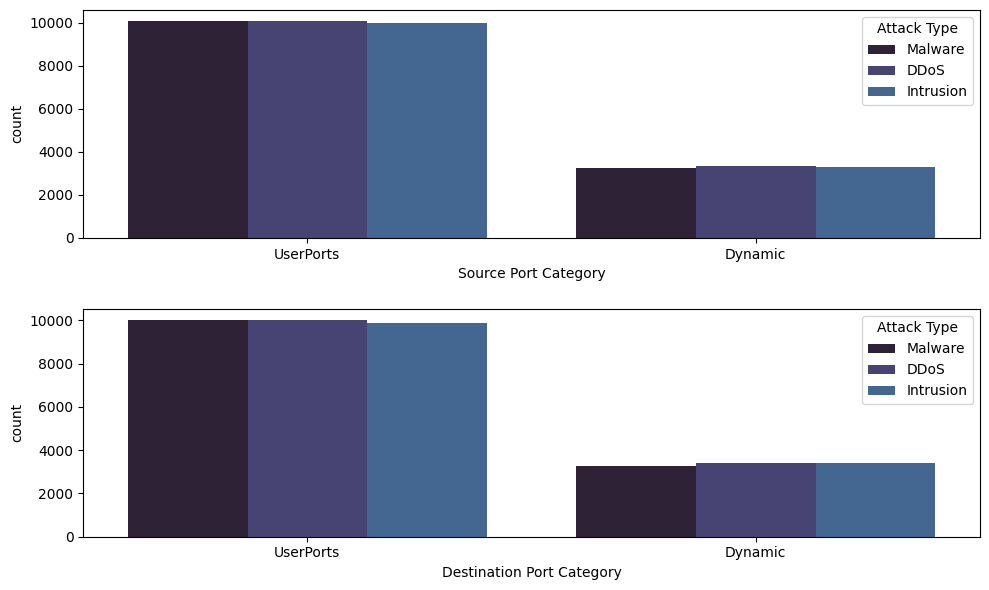

In [135]:
sns.set_palette("mako")

fig,(ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=False)

# Malware Indicators
sns.countplot(data=cyber_security_df, x='Source Port Category', hue='Attack Type',ax=ax1)

# IDS/IPS Alerts
sns.countplot(data=cyber_security_df, x='Destination Port Category', hue='Attack Type',ax=ax2)
plt.tight_layout(h_pad=2)

plt.show()

In [136]:
cyber_security_df['Timestamp'] = pd.to_datetime(cyber_security_df['Timestamp'])
    
cyber_security_df['Year'] = cyber_security_df['Timestamp'].dt.year
cyber_security_df['Month'] = cyber_security_df['Timestamp'].dt.month
cyber_security_df['Hour'] = cyber_security_df['Timestamp'].dt.hour
cyber_security_df['DayOfWeek'] = cyber_security_df['Timestamp'].dt.dayofweek

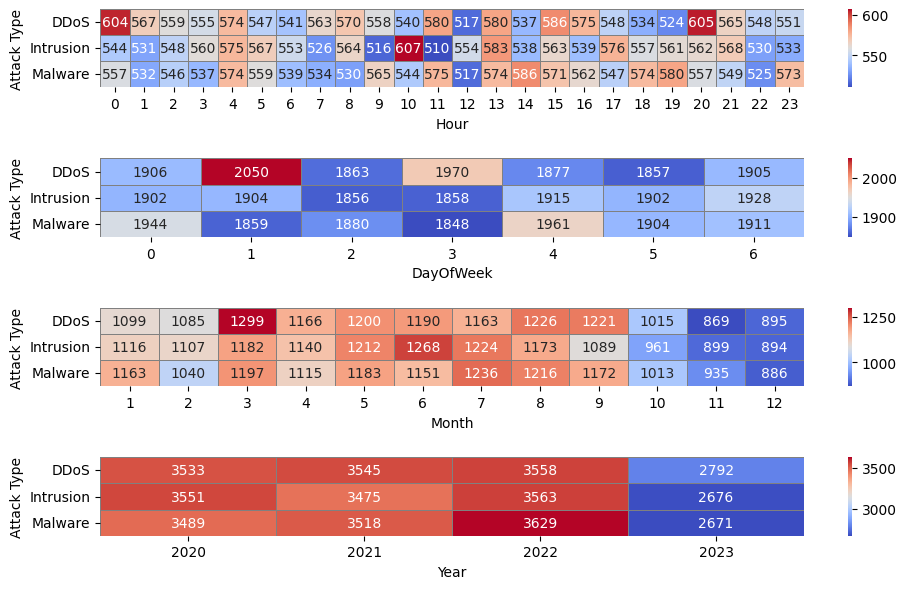

In [137]:
# Pivot the data to get a heatmap-friendly format
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("mako")

fig,(ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 6), sharex=False)

time_axes_pairs = [('Hour', ax1), ('DayOfWeek', ax2), ('Month', ax3), ('Year', ax4)]

for t, ax in time_axes_pairs:
    groupby = cyber_security_df.groupby([t, 'Attack Type']).size().reset_index(name='Count')
    pivot_table = groupby.pivot(index='Attack Type', columns=t, values='Count').fillna(0)
    sns.heatmap(pivot_table, cmap="coolwarm", linewidths=0.5, linecolor="gray", annot=True, fmt=".0f", ax=ax)


plt.tight_layout(h_pad=2)

plt.show()




In [138]:
cyber_security_df["Packet Length Category"] = pd.cut(cyber_security_df['Packet Length'], bins = [0, 64, 512, 1023, 1499, float('inf')], labels = ['Small', 'Medium', 'Large', 'Very Large', 'Huge'])

In [139]:
cyber_security_df = cyber_security_df.sort_values(by='Timestamp')
cyber_security_df['Attack Type'].value_counts()
cyber_security_df.isnull().sum().sort_values(ascending=False)

Timestamp                    0
Source IP Address            0
Destination IP Address       0
Source Port                  0
Destination Port             0
Protocol                     0
Packet Length                0
Packet Type                  0
Traffic Type                 0
Payload Data                 0
Malware Indicators           0
Anomaly Scores               0
Alerts/Warnings              0
Attack Type                  0
Attack Signature             0
Action Taken                 0
Severity Level               0
User Information             0
Device Information           0
Network Segment              0
Geo-location Data            0
Proxy Information            0
Firewall Logs                0
IDS/IPS Alerts               0
Log Source                   0
Source IP Class              0
Destination IP Class         0
Source IP Visibility         0
Destination IP Visibility    0
OS                           0
Browser                      0
Device                       0
Source P

In [140]:
df_proccesed = cyber_security_df.copy()

In [141]:
attack_type_dict = {
    "DDoS": 0,      
    "Malware": 1,  
    "Intrusion": 2    
    
}

df_proccesed['Attack Type'] = df_proccesed['Attack Type'].apply(lambda x: attack_type_dict.get(x))

In [142]:
severity_level_dict = {
    "Low": 0,      
    "Medium": 1,  
    "High": 2    
}

df_proccesed['Severity Level'] = df_proccesed['Severity Level'].apply(lambda x: severity_level_dict.get(x))

In [146]:
df_proccesed["Is Proxy Used"] = df_proccesed['Proxy Information'].apply(lambda x: "No" if pd.isna(x) else "Yes")

In [147]:
from sklearn.preprocessing import StandardScaler 
columns_to_scale = ['Anomaly Scores', 'Packet Length']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling only to selected columns
df_proccesed[columns_to_scale] = scaler.fit_transform(df_proccesed[columns_to_scale])

In [ ]:
cols_to_drop = ['Timestamp', 'Source IP Address', 'Destination IP Address', 'Source Port', 'Destination Port', 'Device Information', 'Proxy Information', "User Information", "Geo-location Data", "Payload Data"]
df_proccesed = df_proccesed.drop(columns=cols_to_drop, axis=1)


In [149]:
df_proccesed.columns

Index(['Protocol', 'Packet Length', 'Packet Type', 'Traffic Type',
       'Malware Indicators', 'Anomaly Scores', 'Alerts/Warnings',
       'Attack Type', 'Attack Signature', 'Action Taken', 'Severity Level',
       'Network Segment', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source',
       'Source IP Class', 'Destination IP Class', 'OS', 'Browser', 'Device',
       'Source Port Category', 'Destination Port Category', 'Year', 'Month',
       'Hour', 'DayOfWeek', 'Packet Length Category', 'Is Proxy Used'],
      dtype='object')

# 1. Exploration of raw data

In [150]:
from sklearn.metrics  import classification_report
from sklearn.model_selection import train_test_split


def evaluate_model(df, model):
    target = 'Attack Type'
    df = df.copy()

    y = df[target]
    x = df.drop(columns=[target], axis=1)

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(classification_report(y_test, y_pred))

In [151]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split

def list_important_features(model, df):
    target = 'Attack Type'
    df = df.copy()

    y = df[target]
    x = df.drop(columns=[target], axis=1)

    selector =  RFECV(
        estimator=model,
        step=1,  # Remove 5 features at a time
        cv=5,
        scoring="accuracy",
        verbose=True
    )

    x_train, _, y_train, _ = train_test_split(x, y, test_size=0.2, random_state=42)

    selector.fit(x_train, y_train)
    for i, col in zip(range(x_train.shape[1]), x_train.columns):
        print(f"{col} selected={selector.support_[i]} rank={selector.ranking_[i]}")


In [152]:
def plot_feature_importance(df):
    df['feature'] = df['feature'].apply(lambda x: x.split('_')[0])
    df = df.groupby('feature').sum()

    df = df.sort_values(by='importance', ascending=False)

    sns.set_palette("mako")

    fig,(ax1) = plt.subplots(1, 1, figsize=(5, 5), sharex=False)

    sns.barplot(x='importance', y='feature', data=df)
    ax1.set_title("Feature vs Importance")

    plt.tight_layout(h_pad=2)

    plt.show()

# Random Forest

In [153]:
df = pd.get_dummies(df_proccesed, drop_first=True, dtype=int)
df.head().T

,17494,33427,26028,38419,29339
Packet Length,1.554055,-0.145305,-0.847163,0.164762,1.582898
Anomaly Scores,-0.328680,-0.246193,-0.305805,-0.118305,1.721350
Attack Type,2.000000,1.000000,1.000000,0.000000,0.000000
Severity Level,2.000000,0.000000,2.000000,2.000000,2.000000
Year,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000
Month,1.000000,1.000000,1.000000,1.000000,1.000000
Hour,0.000000,1.000000,3.000000,3.000000,3.000000
DayOfWeek,2.000000,2.000000,2.000000,2.000000,2.000000
Protocol_TCP,0.000000,0.000000,0.000000,0.000000,0.000000
Protocol_UDP,1.000000,0.000000,0.000000,1.000000,1.000000


In [154]:
from sklearn.ensemble import RandomForestClassifier


rf_clf = RandomForestClassifier(random_state=42)
evaluate_model(df, rf_clf)


              precision    recall  f1-score   support

           0       0.33      0.35      0.34      2697
           1       0.32      0.31      0.32      2726
           2       0.32      0.32      0.32      2577

    accuracy                           0.32      8000
   macro avg       0.32      0.32      0.32      8000
weighted avg       0.32      0.32      0.32      8000



In [214]:
list_important_features(rf_clf, df)

Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 fe

In [155]:
selected_features = ['Anomaly Scores', 'Packet Length', 'Hour', 'Month', 'DayOfWeek', 'Year', 'Severity Level', 'Malware Indicators', 'Firewall Logs', 'IDS/IPS Alerts', 'Traffic Type', 'Attack Signature']
target = ['Attack Type']
df_important = df_proccesed[target + selected_features]
df_important = pd.get_dummies(df_important, drop_first=True, dtype=int)
evaluate_model(df_important, rf_clf)


              precision    recall  f1-score   support

           0       0.33      0.36      0.34      2697
           1       0.34      0.32      0.33      2726
           2       0.32      0.32      0.32      2577

    accuracy                           0.33      8000
   macro avg       0.33      0.33      0.33      8000
weighted avg       0.33      0.33      0.33      8000



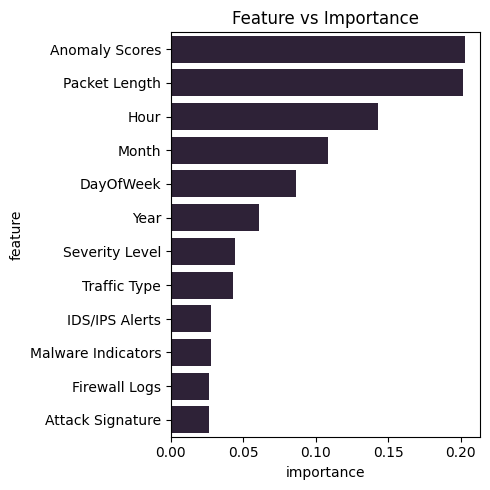

In [156]:

df = pd.DataFrame({
    'feature': rf_clf.feature_names_in_,
    'importance': rf_clf.feature_importances_
})
plot_feature_importance(df)



In [157]:
selected_features = ['Anomaly Scores', 'Packet Length', 'Hour', 'Month', 'DayOfWeek', 'Year', 'Severity Level', 'Log Source', 'Firewall Logs']
target = ['Attack Type']
df_important = df_proccesed[target + selected_features]
df_important = pd.get_dummies(df_important, drop_first=True, dtype=int)
evaluate_model(df_important, rf_clf)

              precision    recall  f1-score   support

           0       0.33      0.34      0.33      2697
           1       0.33      0.32      0.32      2726
           2       0.31      0.31      0.31      2577

    accuracy                           0.32      8000
   macro avg       0.32      0.32      0.32      8000
weighted avg       0.32      0.32      0.32      8000



# Logistic Regression

In [158]:
df = pd.get_dummies(df_proccesed, drop_first=True, dtype=int)
df.head().T

,17494,33427,26028,38419,29339
Packet Length,1.554055,-0.145305,-0.847163,0.164762,1.582898
Anomaly Scores,-0.328680,-0.246193,-0.305805,-0.118305,1.721350
Attack Type,2.000000,1.000000,1.000000,0.000000,0.000000
Severity Level,2.000000,0.000000,2.000000,2.000000,2.000000
Year,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000
Month,1.000000,1.000000,1.000000,1.000000,1.000000
Hour,0.000000,1.000000,3.000000,3.000000,3.000000
DayOfWeek,2.000000,2.000000,2.000000,2.000000,2.000000
Protocol_TCP,0.000000,0.000000,0.000000,0.000000,0.000000
Protocol_UDP,1.000000,0.000000,0.000000,1.000000,1.000000


In [159]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=42, max_iter=500, solver='newton-cg')
evaluate_model(df, lr_clf)

              precision    recall  f1-score   support

           0       0.34      0.33      0.33      2697
           1       0.34      0.32      0.33      2726
           2       0.32      0.35      0.33      2577

    accuracy                           0.33      8000
   macro avg       0.33      0.33      0.33      8000
weighted avg       0.33      0.33      0.33      8000



In [204]:
list_important_features(lr_clf, df)

Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 fe

In [160]:
selected_features = ["Alerts/Warnings", "Source IP Class", "OS", "Device", "Packet Length Category", "Browser", "Packet Type"]           # Rank 1
target = ['Attack Type']
df_important = df_proccesed[target + selected_features]
df_important = pd.get_dummies(df_important, drop_first=True, dtype=int)
evaluate_model(df_important, lr_clf)

              precision    recall  f1-score   support

           0       0.33      0.34      0.34      2697
           1       0.34      0.32      0.33      2726
           2       0.32      0.34      0.33      2577

    accuracy                           0.33      8000
   macro avg       0.33      0.33      0.33      8000
weighted avg       0.33      0.33      0.33      8000



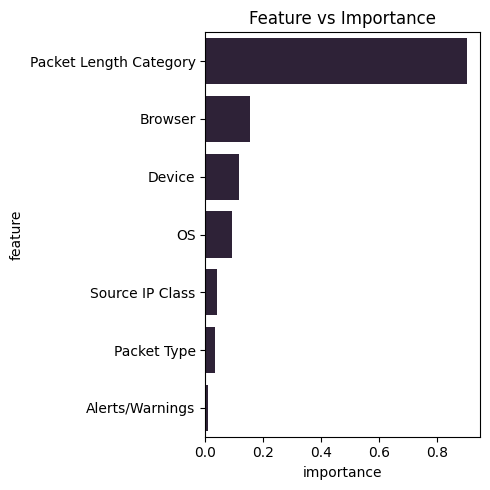

In [161]:
import numpy as np
df = pd.DataFrame({
    'feature': lr_clf.feature_names_in_,
    'importance': np.abs(lr_clf.coef_[0])
})

plot_feature_importance(df)


# XGBRFClassifier

In [162]:
df = pd.get_dummies(df_proccesed, drop_first=True, dtype=int)
df.head().T




,17494,33427,26028,38419,29339
Packet Length,1.554055,-0.145305,-0.847163,0.164762,1.582898
Anomaly Scores,-0.328680,-0.246193,-0.305805,-0.118305,1.721350
Attack Type,2.000000,1.000000,1.000000,0.000000,0.000000
Severity Level,2.000000,0.000000,2.000000,2.000000,2.000000
Year,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000
Month,1.000000,1.000000,1.000000,1.000000,1.000000
Hour,0.000000,1.000000,3.000000,3.000000,3.000000
DayOfWeek,2.000000,2.000000,2.000000,2.000000,2.000000
Protocol_TCP,0.000000,0.000000,0.000000,0.000000,0.000000
Protocol_UDP,1.000000,0.000000,0.000000,1.000000,1.000000


In [163]:
from xgboost import XGBRFClassifier

xg_clf = XGBRFClassifier(random_state=42)
evaluate_model(df, xg_clf)

              precision    recall  f1-score   support

           0       0.33      0.34      0.33      2697
           1       0.32      0.24      0.28      2726
           2       0.32      0.40      0.35      2577

    accuracy                           0.32      8000
   macro avg       0.32      0.33      0.32      8000
weighted avg       0.32      0.32      0.32      8000



In [187]:
list_important_features(xg_clf, df)

Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 fe

In [164]:
selected_features = ['Packet Length', 'Anomaly Scores', 'Year', 'Month', 'Hour', 'DayOfWeek', 'Packet Type', 'Traffic Type', 'Malware Indicators', 'Alerts/Warnings', 'Attack Signature',
                      'Action Taken', 'Network Segment', 'IDS/IPS Alerts', 'Log Source', 'Source IP Class', 'Destination IP Class', 'OS', 'Source Port Category', 'Device']
target = ['Attack Type']
df_important = df_proccesed[target + selected_features]
df_important = pd.get_dummies(df_important, drop_first=True, dtype=int)
evaluate_model(df_important, xg_clf)

              precision    recall  f1-score   support

           0       0.35      0.36      0.35      2697
           1       0.34      0.29      0.31      2726
           2       0.32      0.37      0.35      2577

    accuracy                           0.34      8000
   macro avg       0.34      0.34      0.34      8000
weighted avg       0.34      0.34      0.34      8000



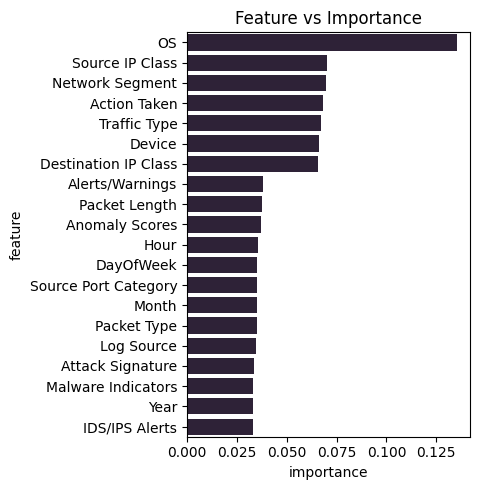

In [165]:
df = pd.DataFrame({
    'feature': xg_clf.feature_names_in_,
    'importance': xg_clf.feature_importances_
})

plot_feature_importance(df)

In [84]:
import joblib

# Save the model
joblib.dump(xg_clf, "xg_cls.pkl")

['xg_cls.pkl']

# SMOTE

In [71]:
from sklearn.model_selection import train_test_split

selected_features = ['Packet Length', 'Anomaly Scores', 'Year', 'Month', 'Hour', 'DayOfWeek', 'Packet Type', 'Traffic Type', 'Malware Indicators', 'Alerts/Warnings', 'Attack Signature',
                      'Action Taken', 'Network Segment', 'IDS/IPS Alerts', 'Log Source', 'Source IP Class', 'Destination IP Class', 'OS', 'Source Port Category', 'Device']
target = 'Attack Type'

df = pd.get_dummies(df_proccesed[[target] + selected_features], drop_first=True, dtype=int)

y = df[target]
x = df.drop(columns=['Attack Type'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [72]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics  import classification_report
from xgboost import XGBRFClassifier




sampling_strat = {0: 50000, 1: 50000, 2: 50000}
smote = SMOTE(sampling_strategy = sampling_strat, random_state = 42)
x_smote, y_smote = smote.fit_resample(x_train, y_train.values)

xg_clf = XGBRFClassifier(random_state=42)
xg_clf.fit(x_smote, y_smote)
y_pred = xg_clf.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.35      0.41      0.38      2697
           1       0.34      0.27      0.30      2726
           2       0.34      0.34      0.34      2577

    accuracy                           0.34      8000
   macro avg       0.34      0.34      0.34      8000
weighted avg       0.34      0.34      0.34      8000



# Clustering

In [74]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
df = pd.get_dummies(df_proccesed, drop_first=True, dtype=int)
df['Cluster'] = kmeans.fit_predict(df)

In [75]:
from xgboost import XGBRFClassifier

selected_features = ['Packet Length', 'Anomaly Scores', 'Year', 'Month', 'Hour', 'DayOfWeek', 'Packet Type', 'Traffic Type', 'Malware Indicators', 'Alerts/Warnings', 'Attack Signature',
                      'Action Taken', 'Network Segment', 'IDS/IPS Alerts', 'Log Source', 'Source IP Class', 'Destination IP Class', 'OS', 'Source Port Category', 'Device']
target = 'Attack Type'

df_important = df_proccesed[[target] + selected_features]
df_important = df_important.assign(Cluster=df['Cluster'])
df_important = pd.get_dummies(df_important, drop_first=True, dtype=int)
xg_clf = XGBRFClassifier(random_state=42)
evaluate_model(df_important, xg_clf)

              precision    recall  f1-score   support

           0       0.35      0.36      0.36      2697
           1       0.34      0.28      0.31      2726
           2       0.33      0.38      0.35      2577

    accuracy                           0.34      8000
   macro avg       0.34      0.34      0.34      8000
weighted avg       0.34      0.34      0.34      8000

